Dataset loaded successfully from C:\Users\DELL\Downloads\archive (1)\fake_news_dataset.csv
Columns in dataset: ['title', 'text', 'date', 'source', 'author', 'category', 'label']

Dataset Shape: (20000, 7)

Missing values in dataset:
title          0
text           0
date           0
source      1000
author      1000
category       0
label          0
dtype: int64

Results for MultinomialNB:
Accuracy: 0.5148
Precision: 0.5204
Recall: 0.5540
F1 Score: 0.5366
Confusion Matrix:
[[ 935 1036]
 [ 905 1124]]

Results for LogisticRegression:
Accuracy: 0.5072
Precision: 0.5144
Recall: 0.5116
F1 Score: 0.5130
Confusion Matrix:
[[ 991  980]
 [ 991 1038]]

Results for PassiveAggressiveClassifier:
Accuracy: 0.5078
Precision: 0.5416
Recall: 0.1927
F1 Score: 0.2843
Confusion Matrix:
[[1640  331]
 [1638  391]]


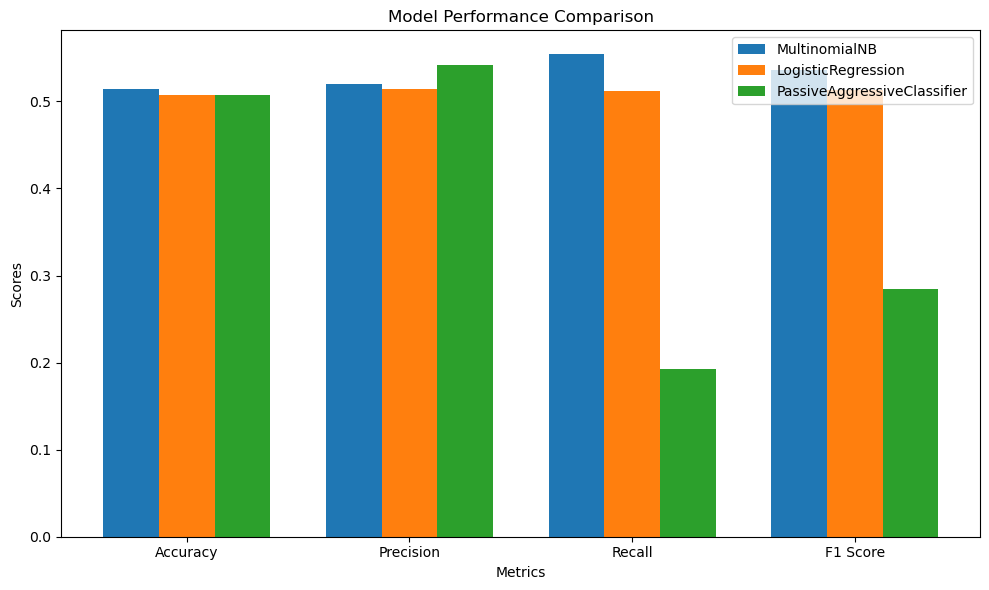


Evaluation complete.


In [3]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
import matplotlib.pyplot as plt
import os

possible_paths = [
    r"C:\Users\DELL\Downloads\archive (1)\fake_news_dataset.csv",
    r"C:\Users\DELL\Downloads\fake_news_dataset.csv",
    r"C:\Users\DELL\Downloads\archive\fake_news_dataset.csv"
]

def load_dataset(paths):
    for file_path in paths:
        if os.path.exists(file_path):
            try:
                df = pd.read_csv(file_path)
                print(f"Dataset loaded successfully from {file_path}")
                print("Columns in dataset:", df.columns.tolist())
                return df, file_path
            except pd.errors.EmptyDataError:
                print(f"Error: {file_path} is empty or corrupted.")
                return None, None
    print("Could not find fake_news_dataset.csv in the specified paths.")
    print("Checked paths:", paths)
    downloads_dir = r"C:\Users\DELL\Downloads"
    if os.path.exists(downloads_dir):
        print("Contents of Downloads folder:", os.listdir(downloads_dir))
    else:
        print(f"Directory {downloads_dir} does not exist.")
    print("To search for the file, run the following code:")
    print("import os")
    print("def find_file(name, path):")
    print("    for root, _, files in os.walk(path):")
    print("        if name in files:")
    print(f"            print('Found: ' + os.path.join(root, name))")
    print("find_file('fake_news_dataset.csv', r'C:\\Users\\DELL\\Downloads')")
    return None, None

train, loaded_path = load_dataset(possible_paths)

if train is None:
    raise SystemExit("Cannot proceed without the dataset. Please fix the file path and rerun.")

print(f"\nDataset Shape: {train.shape}")

print("\nMissing values in dataset:")
print(train.isnull().sum())

train = train.fillna(' ')

try:
    train['total'] = train['title'] + ' ' + train['author'] + ' ' + train['text']
except KeyError as e:
    print(f"Error: {e}. Please check column names in the dataset.")
    print("Available columns:", train.columns.tolist())
    print("Update the column names in the code (e.g., train['title'] to train['correct_column_name']).")
    raise SystemExit("Cannot proceed without correct column names.")

try:
    X = train['total']
    y = train['label']
except KeyError as e:
    print(f"Error: {e}. Please check if 'label' column exists.")
    print("Available columns:", train.columns.tolist())
    print("Update the label column name in the code (e.g., train['label'] to train['is_fake']).")
    raise SystemExit("Cannot proceed without label column.")

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)

models = {
    'MultinomialNB': MultinomialNB(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'PassiveAggressiveClassifier': PassiveAggressiveClassifier(max_iter=1000)
}

results = {}
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_val_tfidf)
    accuracy = metrics.accuracy_score(y_val, y_pred)
    precision = metrics.precision_score(y_val, y_pred, pos_label='fake')
    recall = metrics.recall_score(y_val, y_pred, pos_label='fake')
    f1 = metrics.f1_score(y_val, y_pred, pos_label='fake')
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
    print(f"\nResults for {name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    cm = metrics.confusion_matrix(y_val, y_pred, labels=['real', 'fake'])
    print(f"Confusion Matrix:\n{cm}")

metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
model_names = list(results.keys())
scores = np.array([[results[model][metric] for metric in metrics_names] for model in model_names])

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(metrics_names))
width = 0.25

for i, model in enumerate(model_names):
    ax.bar(x + i * width, scores[i], width, label=model)

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x + width * (len(model_names) - 1) / 2)
ax.set_xticklabels(metrics_names)
ax.legend()
plt.tight_layout()
plt.show()

print("\nEvaluation complete.")